In [1]:
# !로 시작하는 명령은 terminal 명령
!pip list | findstr seaborn

seaborn                   0.13.2


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

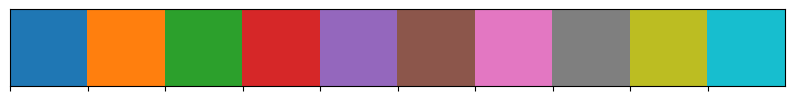

In [3]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

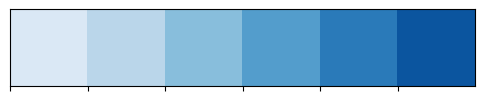

In [4]:
sns.palplot(sns.color_palette("Blues"))

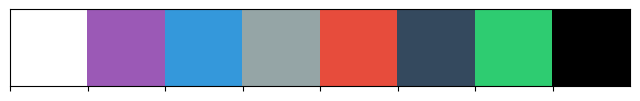

In [5]:
flatui = ['#ffffff', "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#000000"]
sns.palplot(sns.color_palette(flatui))


In [ ]:
# 두 변수 사이의 관계 표현
tips = sns.load_dataset("tips") # 내장 데이터셋 가져오기
print( type( tips ) )
tips.info()
tips.head()

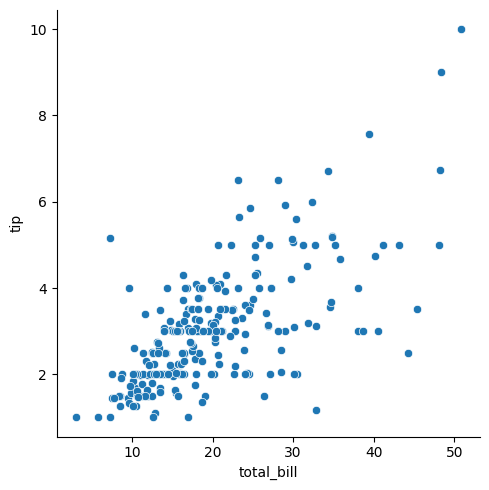

In [7]:
sns.relplot(x="total_bill", y="tip", data=tips)

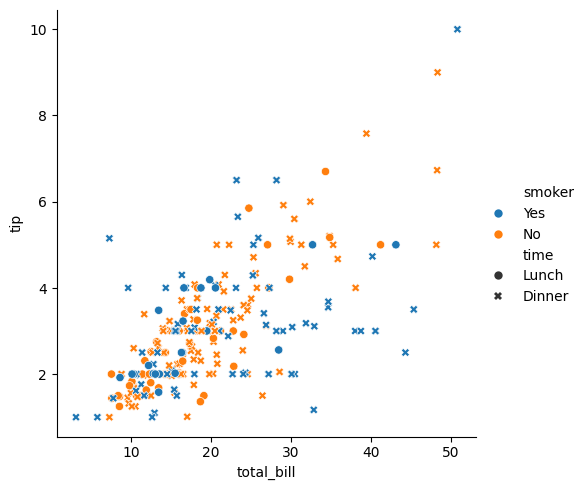

In [12]:
# 범주형 변수와 시각화 특성 바인딩
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
# sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
plt.show()

[2 3 4 1 6 5]


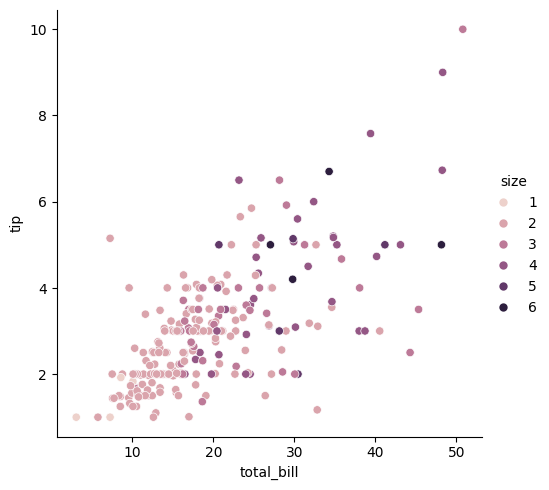

In [14]:
# 연속형 변수와 시각화 특성 바인딩
print(tips["size"].unique()) # size 컬럼의 값을 중복을 제거하고 출력
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)
plt.show()


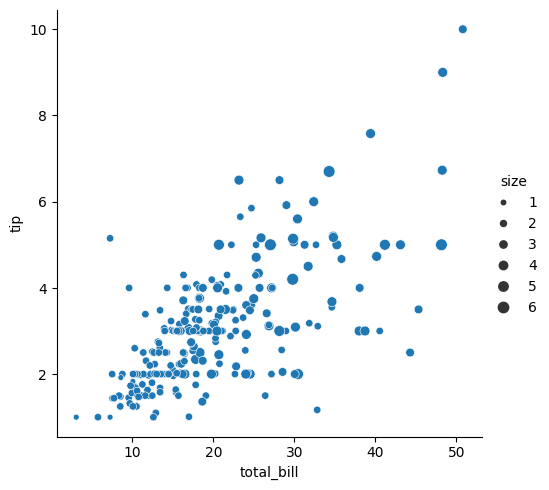

In [16]:
# 연속형 변수와 시각화 특성 바인딩
sns.relplot(x="total_bill", y="tip", size="size", data=tips)
plt.show()

In [ ]:
# 두 변수 사이의 관계
# 불확실성 표시
fmri = sns.load_dataset("fmri")
print( type(fmri) )
fmri.info()
fmri.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


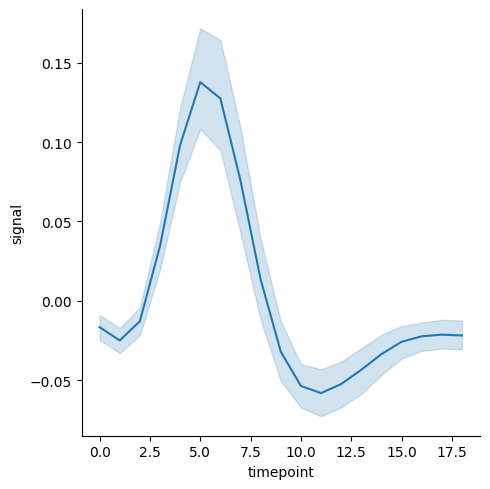

In [20]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
plt.show()

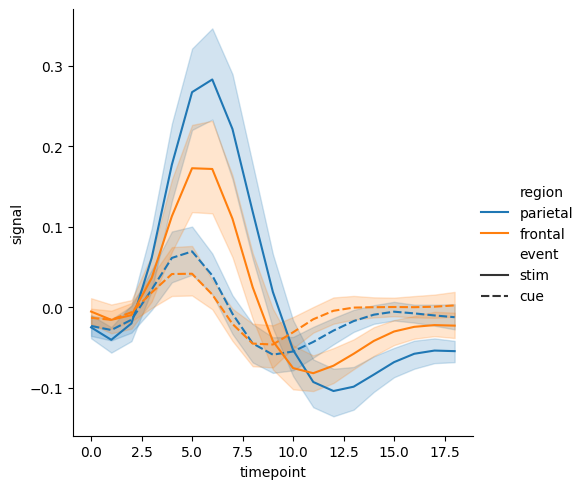

In [21]:
# 데이터와 시각화 특성 바인딩
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri)
plt.show()

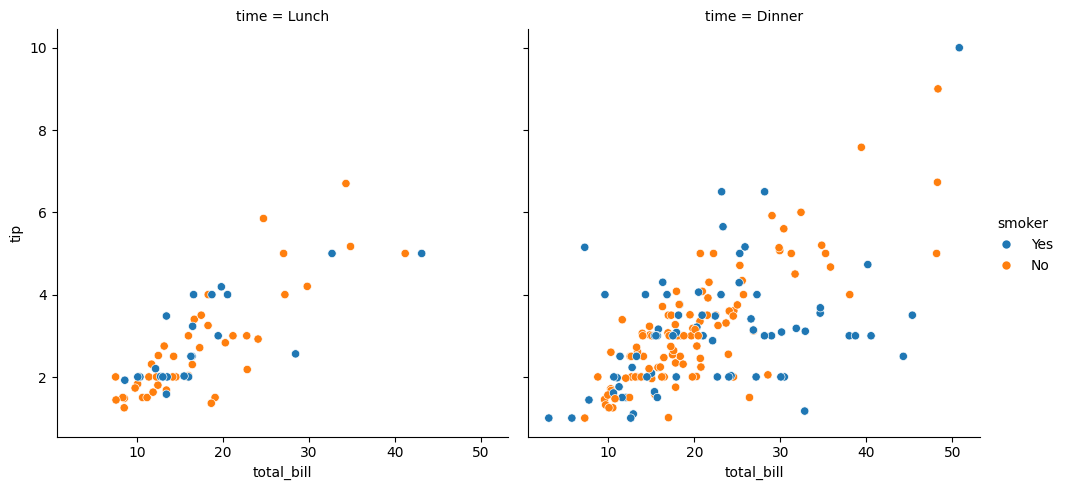

In [22]:
# 컬럼에 비교할 분류 바인딩
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)
plt.show()

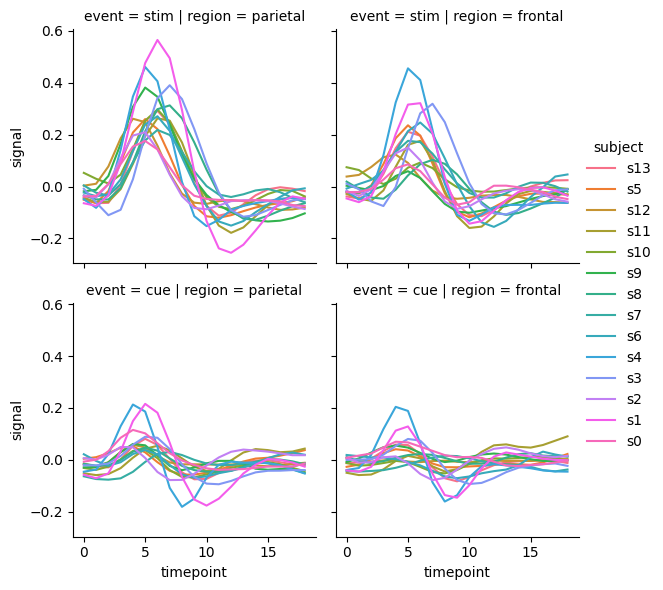

In [24]:
# 행과 열에 비교할 분류 바인딩
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)
plt.show()

In [32]:
fmri['region'].unique() # region 컬럼의 데이터를 중복을 제거하고 반환
# mask = fmri['region'] == 'frontal'
# fmri[mask]
fmri.query("region == 'frontal'") # 위 두 줄의 코드와 같은 효과

,subject,timepoint,event,region,signal
67,s0,0,stim,frontal,-0.021452
170,s2,6,stim,frontal,0.101050
267,s10,4,stim,frontal,0.030044
268,s11,4,stim,frontal,0.075957
269,s3,0,stim,frontal,0.011056
...,...,...,...,...,...
1058,s1,8,cue,frontal,-0.136059
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939


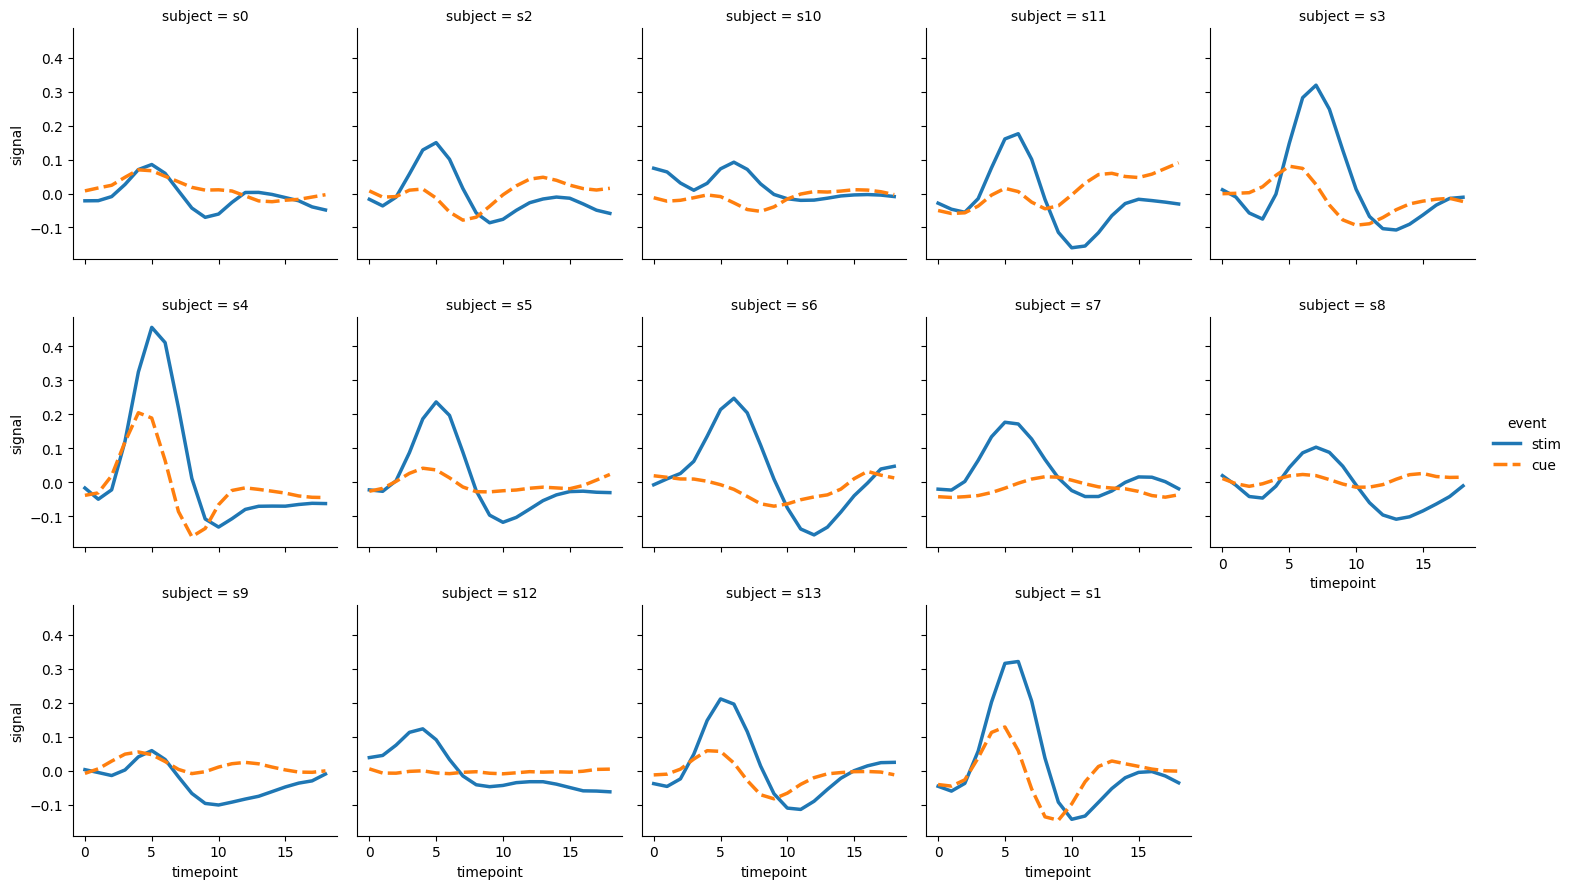

In [26]:
# 비교할 분류가 많은 경우 한 행에 표시할 최대 플롯 개수 지정 : wrap
sns.relplot(x="timepoint", y="signal", hue="event", style="event", 
            col="subject", col_wrap=5, height=3, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))
plt.show()